In [82]:
import pandas as pd
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
%matplotlib inline

In [83]:
'''
Part 1: UFO
'''
ufo = pd.read_csv('../data/ufo.csv')   # can also read csvs directly from the web!
print ufo.head()
ufo.describe()


                   City Colors Reported Shape Reported State             Time
0                Ithaca             NaN       TRIANGLE    NY   6/1/1930 22:00
1           Willingboro             NaN          OTHER    NJ  6/30/1930 20:00
2               Holyoke             NaN           OVAL    CO  2/15/1931 14:00
3               Abilene             NaN           DISK    KS   6/1/1931 13:00
4  New York Worlds Fair             NaN          LIGHT    NY  4/18/1933 19:00


,City,Colors Reported,Shape Reported,State,Time
count,80496,17034,72141,80543,80543
unique,13504,31,27,52,68901
top,Seattle,ORANGE,LIGHT,CA,7/4/2014 22:00
freq,646,5216,16332,10743,45


In [84]:
# 1. change the column names so that each name has no spaces
#           and all lower case (replace spaces with underscores)

import re

cols = list(ufo.columns)
cols = [i.lower() for i in cols]
cols = [i.replace(' ', '_') for i in cols]
#print cols

ufo.columns = cols
ufo.head()

,city,colors_reported,shape_reported,state,time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


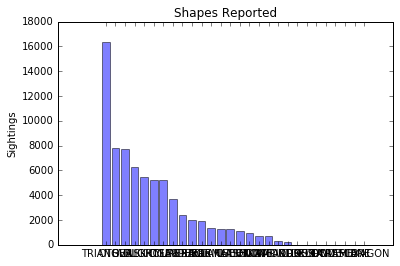

In [85]:
# 2. Show a bar chart of all shapes reported

#objects = ('Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp')
#y_pos = np.arange(len(objects))
#performance = [10,8,6,4,2,1]
 
#plt.bar(y_pos, performance, align='center', alpha=.5)
#plt.xticks(y_pos, objects)
#plt.ylabel('Usage')
#plt.title('Programming language usage')
#plt.show()

#need a list of all the unique shapes reported
shapes = ufo.shape_reported.unique()
y_pos2 = np.arange(len(shapes))
#need a list of the counts for each shape
#for each shape, count the number of rows with that shape

#light = ufo[ufo['shape_reported'] == 'LIGHT']

nums = []
for shape in shapes:
    nums.append(len(ufo[ufo['shape_reported'] == shape]))
nums = sorted(nums, reverse=True)

plt.bar(y_pos2, nums, align='center', alpha=.5)
plt.xticks(y_pos2, shapes)
plt.ylabel('Sightings')
plt.title('Shapes Reported')
plt.show()
                
# check integral plot spacing in matplotlib
    
#ufo.shape_reported.value.count().plot(kind='bar')



In [ ]:
# 3. Show a dataframe that only displays the reportings from Utah

utah_ufo = ufo[ufo['state'] == 'UT']
#better:  ufo[ufo.state=='UT']

utah_ufo.describe()
#utah_ufo.head()

In [ ]:
# 4. Show a dataframe that only displays the reportings from Texas

tx_ufo = ufo[ufo['state'] == 'TX']
tx_ufo.describe()

In [ ]:
# 5. Show a dataframe that only displays the reportings from Utah OR Texas

#couldn't get this to work
#ut_tx_ufo = ufo[ufo['state'] == 'TX', 'UT']

#DataFrame.append(other, ignore_index=False, verify_integrity=False)

ut_tx_ufo = utah_ufo.append(tx_ufo)

#hunter ufo[ufo.state.isin(['UT','TX"])]
#hunter ufo[(ufo.state=='UT')|(ufo.state=='TX')]

print len(utah_ufo)
print len(tx_ufo)
print len(ut_tx_ufo)

ut_tx_ufo.describe()


In [ ]:
# 6. Which shape is reported most often?
ufo.describe()

#hunter: ufo.shape_reported.value_counts().head(1)

In [14]:
'''
Part 2: FIFA GOALS
'''

goals = pd.read_csv('../data/fifa_goals.csv')
goals.sort_index(by='team1score', inplace = True)
goals.head(25)


/Users/alexlove/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,game_id,minute,player,team1score,team2score
1103,422,80,VlaoviÄ,0,2
1414,551,34,J. Cole,0,1
1423,554,60,FlÃ¡vio,0,1
1425,556,10,Å½igiÄ,0,1
1426,556,20,IliÄ,0,2
1430,557,26,Materazzi,0,1
1431,557,87,Inzaghi,0,2
1444,561,36,Juanito,0,1
1446,563,55,Vieira,0,1
1447,563,61,Henry,0,2


In [15]:
# 1. Some elements in the minute column have a  '+', remove it and cast each element as an int!
#     Hint: To replace, use a .apply lambda function to remove any plus symbols
#     Hint: look up pandas dataframes astype method
#     To check use the dataframe.describe() method to see if it is an integer


goals['minute'] = goals['minute'].apply(lambda x: x.strip('+'))
goals['minute'] = goals['minute'].apply(lambda x: int(x))

#goals.head(25)
goals.describe()

#hunter: goals.minute = goals.minute.apply(lambda x: x.replace('+','')).astype(int)
#remove the +, then make the whole thing an int

,game_id,minute,team1score,team2score
count,2207.000000,2207.000000,2207.000000,2207.000000
mean,428.732216,50.905754,1.754418,0.849570
std,251.548662,27.514559,1.486246,0.914291
min,1.000000,1.000000,0.000000,0.000000
25%,242.000000,27.000000,1.000000,0.000000
50%,422.000000,53.000000,1.000000,1.000000
75%,651.500000,75.000000,2.000000,1.000000
max,836.000000,120.000000,9.000000,7.000000


In [19]:
# 2. Show goals scored in the first 5 minutes of a game

#ufo[ufo['state'] == 'UT']

earlygoals = goals[goals['minute'] < 6]
earlygoals.head()
earlygoals.describe()

,game_id,minute,team1score,team2score
count,82.000000,82.000000,82.000000,82.000000
mean,420.439024,3.182927,0.634146,0.402439
std,270.661243,1.352894,0.555826,0.493407
min,6.000000,1.000000,0.000000,0.000000
25%,218.500000,2.000000,0.000000,0.000000
50%,404.000000,3.000000,1.000000,0.000000
75%,677.750000,4.000000,1.000000,1.000000
max,831.000000,5.000000,2.000000,1.000000


In [22]:
# 3. Show goals scored after the regulation 90 minutes is over

lategoals = goals[goals['minute'] > 90]
lategoals.head()
lategoals.describe()

,game_id,minute,team1score,team2score
count,56.000000,56.000000,56.000000,56.000000
mean,408.500000,105.767857,2.339286,1.821429
std,244.408972,8.996951,1.338612,1.237404
min,2.000000,91.000000,0.000000,0.000000
25%,265.750000,98.000000,1.000000,1.000000
50%,385.500000,105.000000,2.000000,2.000000
75%,608.500000,113.500000,3.000000,2.250000
max,833.000000,120.000000,6.000000,5.000000


In [87]:
# 4. Show the top scoring players

#Series.value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)

#stuff = goals['player'].value_counts
#print type(stuff)

# dataframe of players, number of goals scored

players = goals['player'].unique()
 
goal_totals = []
for x in range(len(players)):
    goal_totals.append(0)


goals_by_player = []
#for player in players:
#    print player
#    goals_by_player.append(0)
    
#data2 = [range(1, 5), range(5, 9)]  # list of lists
#arr2 = np.array(data2)              # 2d array

#goals_and_players = [players, goal_totals]
#goals_by_player = np.array(goals_and_players)

#dfgoals_by_player = pd.DataFrame(goals_by_player)
#dfgoals_by_player.head()

#goals_by_player = []
#for player in players:
#    print player
#    goals_by_player.append(0)
#
#goals_by_player = {}

#    goals_by_player[player] = 0

#for player in players:
#    goals_by_player.append[player,0]
    
#print goals_by_player

#for i in goals_by_player:
#   print goals_by_player[i]

#for row in goals:
   
    #get the player
    #player = goals['player']
    #print player
    #get the goals for the player
    #print goals_by_player[player]
    #print goals['player']
    #print goals_by_player[player]
    
    #add one to goals for the player
    
    
    #print goals_by_player[player]
    #total = goals_by_player[player] 
    #print total


# sort by number of goals scored
# show top 10

goals['player'].value_counts().head(5)


MÃ¼ller     20
Klose       14
Ronaldo     14
Fontaine    13
PelÃ©       12
Name: player, dtype: int64

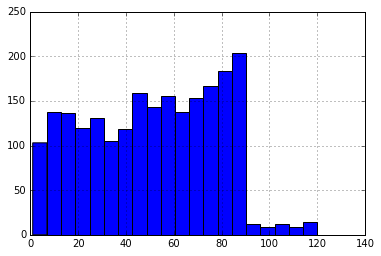

In [88]:
# 5. Show a histogram (distribution) of minutes with 20 bins

#hunter: 
goals.minute.hist(bins=20)

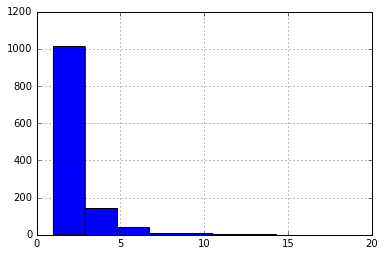

In [90]:
# 6. Show a histogram of the number of goals scored by players

#hunter
goals.player.value_counts().hist()